# **Digirise Infolabs - ML & Data Science Internship**

# **Beginner Level  :**
# **TASK 1 - FAKE NEWS DETECTION**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement: Develop an machine learning algorithm or model that can accurately classify news articles as either real or fake based on a set of input features. This may involve using natural language processing (NLP) techniques to analyze the text of the article, as well as other features stored in the dataset. Use the dataset given below:

#### Dataset link :- https://www.kaggle.com/datasets/jainpooja/fake-news-detection/data

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Understanding the dataset

In [3]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
#Inserting a column "class" as target feature
data_fake["class"] = 0
data_true["class"] = 1

In [9]:
print(data_fake.shape)
print(data_true.shape)

(23481, 5)
(21417, 5)


### Concatinating both dataset

In [10]:
data = pd.concat([data_fake, data_true], axis =0 )
data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [11]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [12]:
# Removing columns which are not required
df = data.drop(["title", "subject","date"], axis = 1)

In [13]:
df.isnull().sum()

text     0
class    0
dtype: int64

### Creating a function to process the texts

In [14]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
df["text"] = df["text"].apply(wordopt)

### Preparing Data for Modelling

In [16]:
x = df["text"]
y = df["class"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Converting text to vectors

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Logistic Regression Algorithm

In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [20]:
pred_lr=LR.predict(xv_test)

In [21]:
LR.score(xv_test, y_test)

0.9869933184855234

In [22]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5922
           1       0.98      0.99      0.99      5303

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



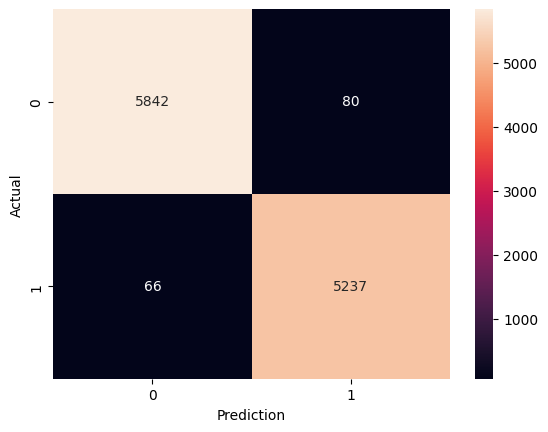

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test,pred_lr), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()

### Decision Tree Algorithm

In [23]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [24]:
pred_dt = DT.predict(xv_test)

In [25]:
DT.score(xv_test, y_test)

0.9971492204899778

In [26]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5922
           1       1.00      1.00      1.00      5303

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



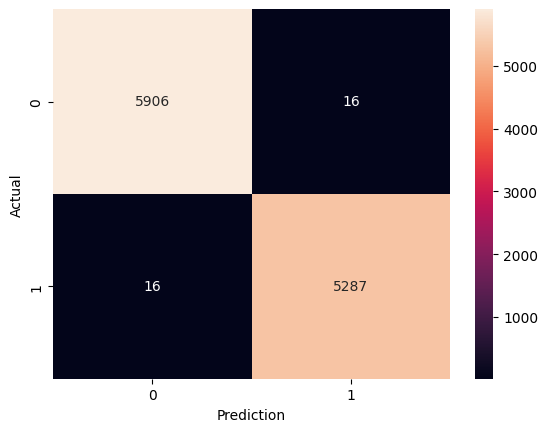

In [32]:
ax1 = sns.heatmap(confusion_matrix(y_test,pred_dt), annot=True, fmt="d")
ax1.set(xlabel='Prediction', ylabel='Actual')
plt.show()

### Checking the more frequent words in WordClound

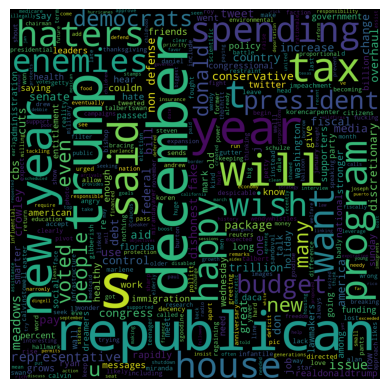

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word = x[0] #the first news
wc = WordCloud(background_color="black", max_words=3000, max_font_size=256,
               random_state=13, width=1500, height=1500, prefer_horizontal=0.5)
wc.generate(' '.join(word))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Conclusion - Hence, the best model for the fitting was the Decision Tree Algorithm. It gave us a score of 0.9971492204899778. While Logistic Regression gave us a score of 0.9869933184855234.

# **--------------------------------------------Thank You--------------------------------------------**